# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [8]:
print(f"Is there any NaN Values? {df_data.isna().values.any()}")

Is there any NaN Values? True


In [9]:
print(f"Is there any duplicated Values? {df_data.duplicated().values.any()}")

Is there any duplicated Values? False


In [10]:
df_data = df_data.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

## Descriptive Statistics

In [11]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [13]:
org_counts = df_data.Organisation.value_counts()
org_counts

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Rocket Lab            13
ISA                   13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
CASIC                  5
KCST                   5
Exos                   4
CECLES                 4
Arm??e de l'

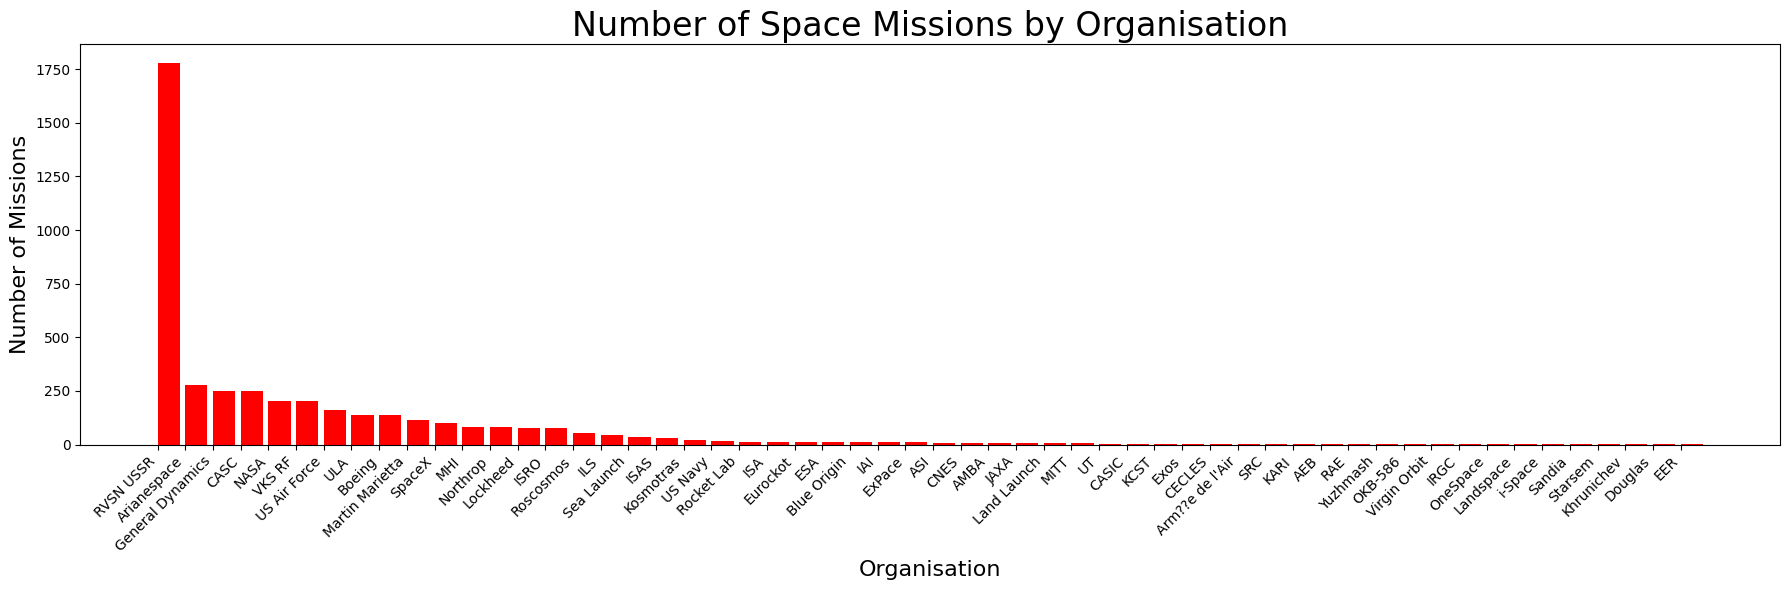

In [14]:
plt.figure(figsize=(18,6))

plt.bar(
    org_counts.index,
    org_counts.values,
    color="red",
    align="edge",
)

plt.title("Number of Space Missions by Organisation", fontsize=24)
plt.xlabel("Organisation", fontsize=16)
plt.ylabel("Number of Missions", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [15]:
rocket_status_count = df_data.Rocket_Status.value_counts()
rocket_status_count

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

In [16]:
retired_roc_count = rocket_status_count[rocket_status_count.index == 'StatusRetired'].values
active_roc_count = rocket_status_count[rocket_status_count.index == 'StatusActive'].values

print(f"There are {retired_roc_count} retired rockets and {active_roc_count} active rockets.")

There are [3534] retired rockets and [790] active rockets.


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [17]:
df_data.Mission_Status.value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [18]:
df_data.Price = pd.to_numeric(df_data.Price, errors="coerce")

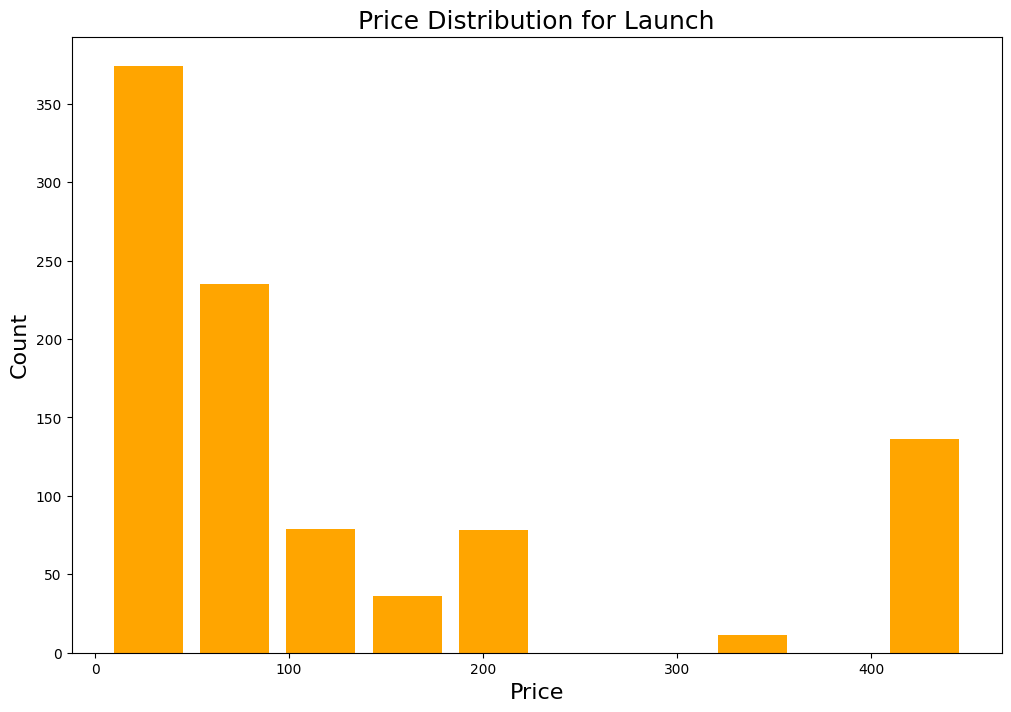

In [19]:
plt.figure(figsize=(12,8))

plt.hist(
    df_data.Price,
    color="orange",
    rwidth=0.8 # relative width, the gap between the bar
)

plt.xlabel("Price", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Price Distribution for Launch", fontsize = 18)

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [20]:
df_data["Country"] = df_data.Location.str.split(",").str[-1].str.strip() # the last element has a space at the head.
df_data.Country = df_data.Country.replace(
    {
        "Russia": "Russian Federation",
        "New Mexico": "USA",
        "Yellow Sea": "China",
        "Shahrud Missile Test Site": "Iran, Islamic Republic of",
        "Pacific Missile Range Facility": "USA",
        "Barents Sea": "Russian Federation",
        "Gran Canaria": "USA",
    }
)
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan


In [21]:
def name_to_alpha3(name):
    try:
        return countries.get(name).alpha3
    except KeyError:
        return None
        
df_data["ISO"] = df_data.Country.apply(name_to_alpha3)

In [22]:
country_launch_times = df_data.groupby("ISO", as_index=False).agg({"Mission_Status": pd.Series.count})
country_launch_times.columns = ["Country", "Launch_Count"]

In [23]:
plt.figure(figsize=(12,8))

fig = px.choropleth(
    data_frame=country_launch_times,
    locations="Country",
    color="Launch_Count",
    color_continuous_scale=px.colors.sequential.matter,
    title="Number of Launch by Country"
)

fig.show()

<Figure size 1200x800 with 0 Axes>

# Use a Choropleth Map to Show the Number of Failures by Country


In [24]:
failure_mission = df_data[df_data.Mission_Status != "Success"]
country_failure = failure_mission.groupby("ISO", as_index=False).agg({"Mission_Status": pd.Series.count})
country_failure.columns = ["Country", "Failure_Launch"]
country_failure

,Country,Failure_Launch
0,AUS,3
1,BRA,3
2,CHN,25
3,FRA,18
4,IND,13
5,ISR,2
6,JPN,13
7,KAZ,93
8,NZL,2
9,RUS,93


In [25]:
plt.figure(figsize=(12,8))

fig = px.choropleth(
    data_frame=country_failure,
    locations="Country",
    color="Failure_Launch",
    color_continuous_scale=px.colors.sequential.matter,
    title="Number of Failure Launch by Country"
)

fig.show()

<Figure size 1200x800 with 0 Axes>

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [26]:
fig = px.sunburst(
    df_data,
    path=['Country', 'Organisation', 'Mission_Status'],
    values=None,
    color="Mission_Status"
)

fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [27]:
organization_spend = df_data.groupby("Organisation", as_index=False).agg({"Price": pd.Series.sum})
organization_spend = organization_spend.sort_values("Price", ascending=False)
organization_spend

,Organisation,Price
35,NASA,"61,200.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
7,CASC,"6,340.26"
46,SpaceX,"5,444.00"
36,Northrop,"3,930.00"
32,MHI,"3,532.50"
23,ISRO,"2,177.00"
49,US Air Force,"1,550.92"
52,VKS RF,"1,548.90"


In [28]:
fig = px.bar(
    x=organization_spend.Organisation,
    y=organization_spend.Price,
    color=organization_spend.Price,
)

fig.update_layout(
    xaxis_title = "Organization",
    yaxis_title = "Price",
)

fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [29]:
organization_per_launch = df_data.groupby("Organisation", as_index=False).agg({"Price": pd.Series.sum, "Mission_Status": pd.Series.count})
organization_per_launch["Price_Per_Launch"] = organization_per_launch.Price / organization_per_launch.Mission_Status
organization_per_launch = organization_per_launch.sort_values("Price_Per_Launch", ascending=False)

In [30]:
fig = px.bar(
    x=organization_per_launch.Organisation,
    y=organization_per_launch.Price_Per_Launch,
    color=organization_per_launch.Price_Per_Launch,
)

fig.update_layout(
    xaxis_title = "Organization",
    yaxis_title = "Price per launch",
)

fig.show()

# Chart the Number of Launches per Year

In [31]:
df_data.Date = pd.to_datetime(df_data.Date, errors="coerce", utc=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA


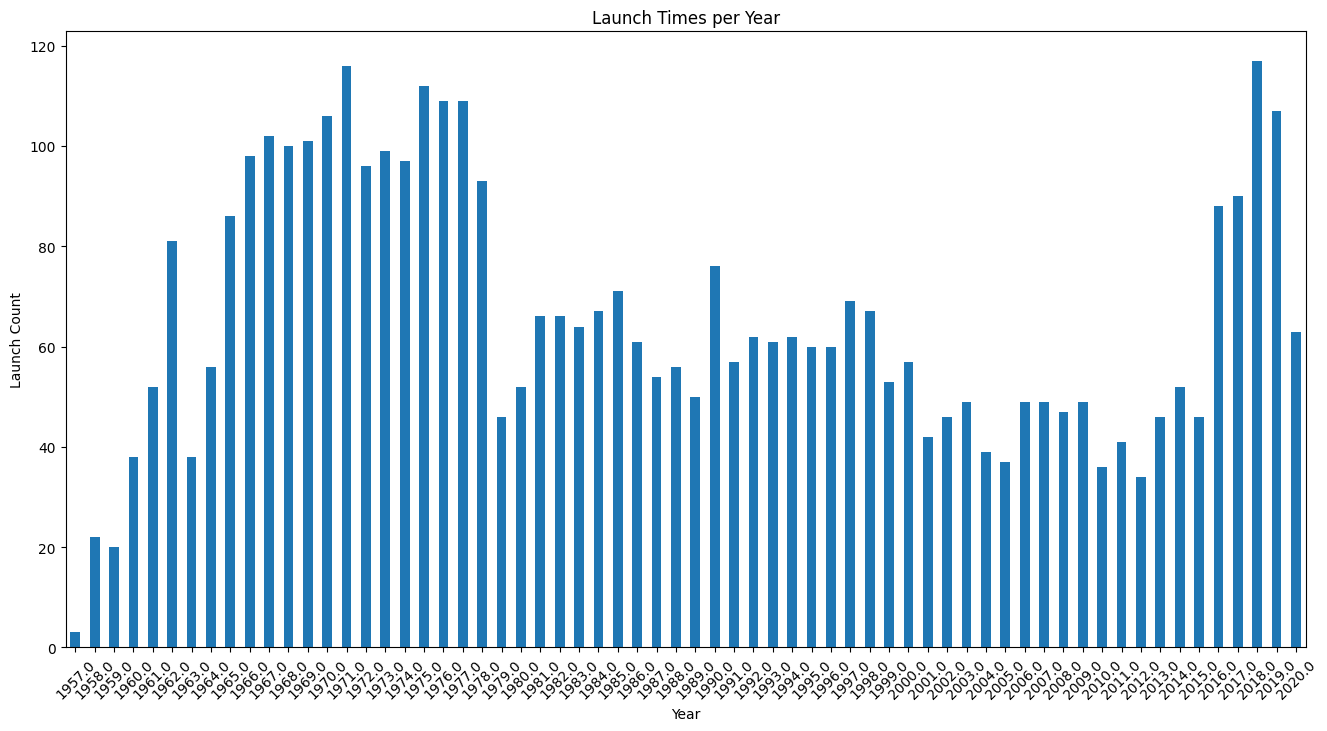

In [32]:
launch_count_per_year = df_data.Date.dt.year.value_counts().sort_index()

plt.figure(figsize=(16,8))
launch_count_per_year.plot(kind="bar")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Launch Count")
plt.title("Launch Times per Year")
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [33]:
monthly_counts = df_data.resample("ME", on="Date").size().rename("Launches")
rolling_avg = monthly_counts.rolling(window=12, min_periods=1).mean().rename("12-Month Rolling Avg")

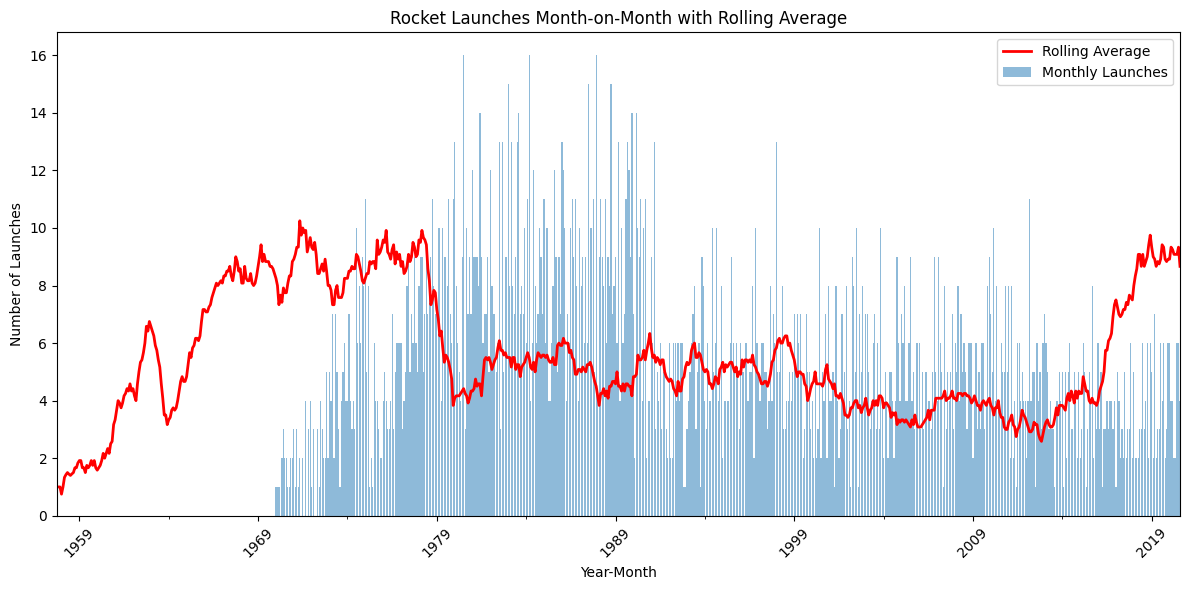

In [34]:
fig, ax = plt.subplots(figsize=(12,6))

monthly_counts.plot(kind='bar', ax=ax, alpha=0.5, label='Monthly Launches', width=0.8)

rolling_avg.plot(ax=ax, color='red', linewidth=2, label='Rolling Average')

ax.set_title('Rocket Launches Month-on-Month with Rolling Average')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of Launches')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

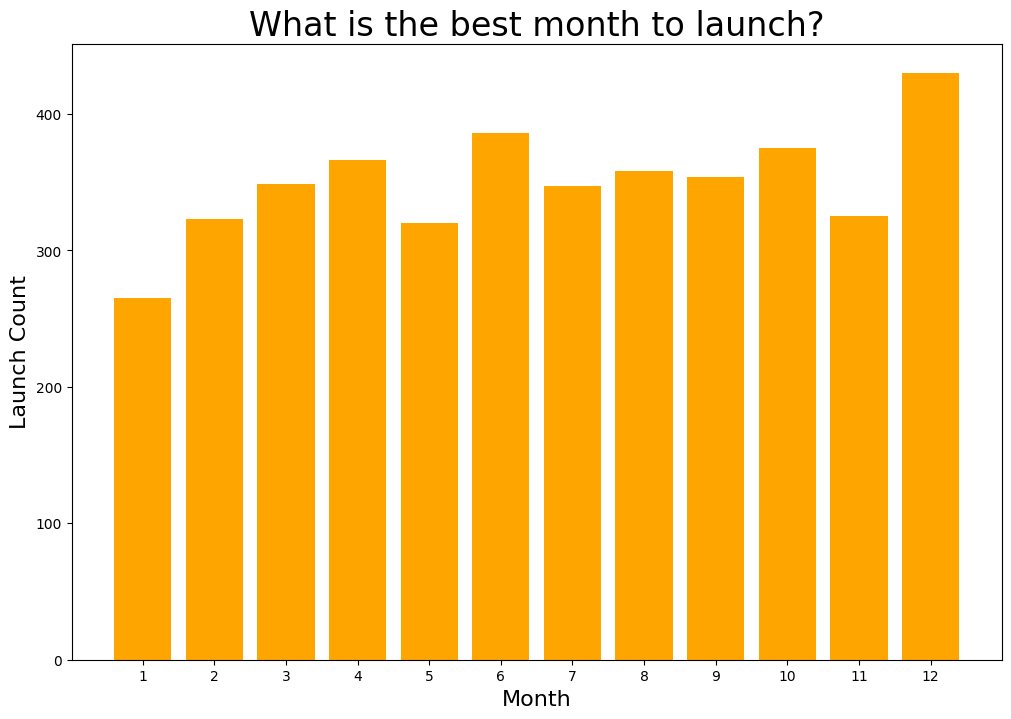

In [35]:
month = df_data.Date.dt.month.value_counts()
month = month.reset_index()
month.columns = ["Month", "Count"]
month = month.sort_values("Month")

plt.figure(figsize=(12,8))
plt.bar(
    month.Month,
    month.Count,
    color = "orange"
)
plt.title("What is the best month to launch?", fontsize =24)
plt.xlabel("Month", fontsize =16)
plt.ylabel("Launch Count", fontsize =16)
plt.xticks(month.Month)
plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
df_data["Year"] = df_data.Date.dt.year
avg_price_per_year = df_data.groupby("Year")["Price"].mean()

Year
1,957.00     NaN
1,958.00     NaN
1,959.00     NaN
1,960.00     NaN
1,961.00     NaN
            ... 
2,016.00   79.46
2,017.00   69.49
2,018.00   64.75
2,019.00   59.61
2,020.00   56.65
Name: Price, Length: 64, dtype: float64

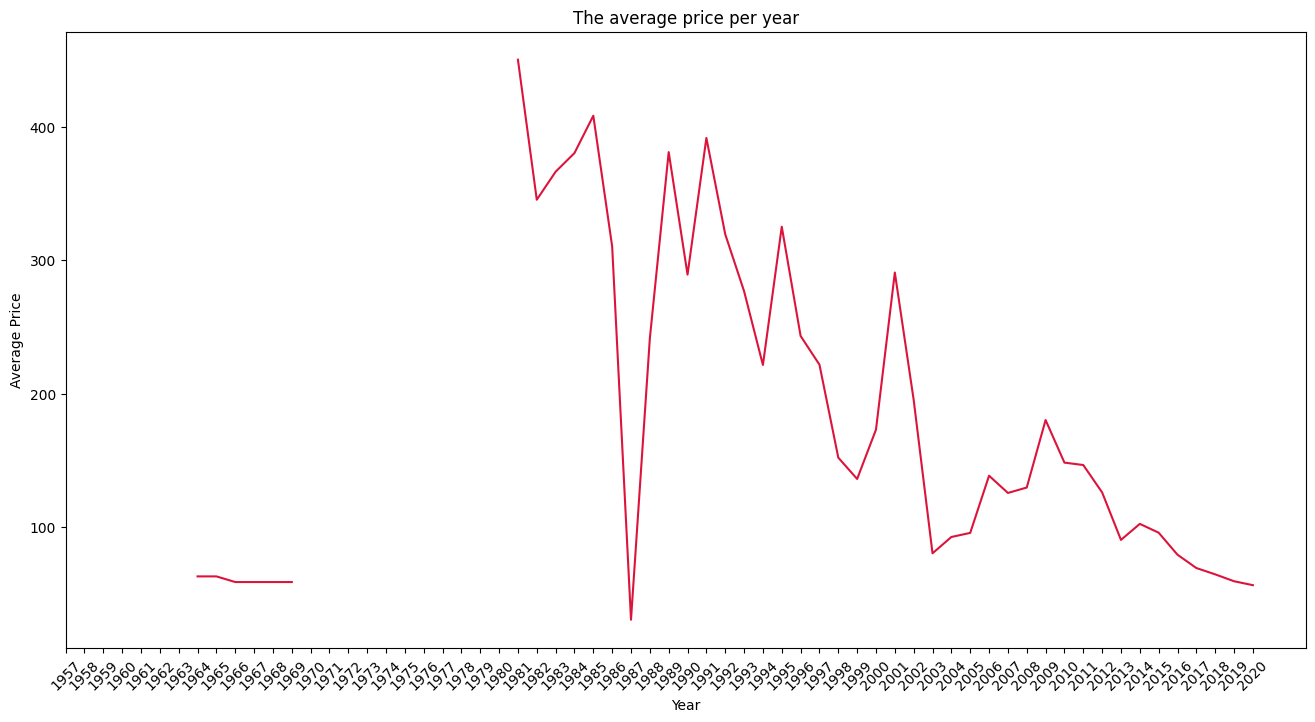

In [40]:
plt.figure(figsize=(16,8))

plt.plot(
    avg_price_per_year.index,
    avg_price_per_year.values,
    color="crimson",
)

plt.title("The average price per year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.xticks(avg_price_per_year.index, rotation=45)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 